In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install pandas openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [4]:
file_path = 'PT_auto_maju.xlsx'

all_sheets = pd.read_excel('PT_auto_maju.xlsx', sheet_name=None)

for sheet_name, data in all_sheets.items():
    print(f"Data dari sheet: {sheet_name}")
    print(data)
    print("\n")

Data dari sheet: Manufacturers
  ManufacturerID ManufacturerName    Country  Founded                   CEO
0           M001    PT. Auto Maju  Indonesia     2010  Rizka Putri Arisanti


Data dari sheet: Models
  ModelID    ModelName ManufacturerID   Category  LaunchYear      price  Stock
0  MDL001     Roadster           M001      Sedan        2004  300000000    100
1  MDL002    Speedster           M001        SUV        2001  500000000    100
2  MDL003     EcoDrive           M001  Hatchback        2002  230000000    100
3  MDL004   LuxuryLine           M001      Sedan        2015  800000000    100
4  MDL005       SportX           M001      Sport        2001  600000000    100
5  MDL006   FamilyPlus           M001        SUV        2018  350000000    100
6  MDL007    HybridOne           M001     Hybrid        2004  400000000    100
7  MDL008  ElectricFly           M001   Electric        2010  450000000    100
8  MDL009    UrbanMove           M001  Hatchback        2012  180000000    100
9

C:\Users\robbe\AppData\Local\Temp\ipykernel_24644\620742451.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_model, y=sales_by_model.index, palette="viridis")


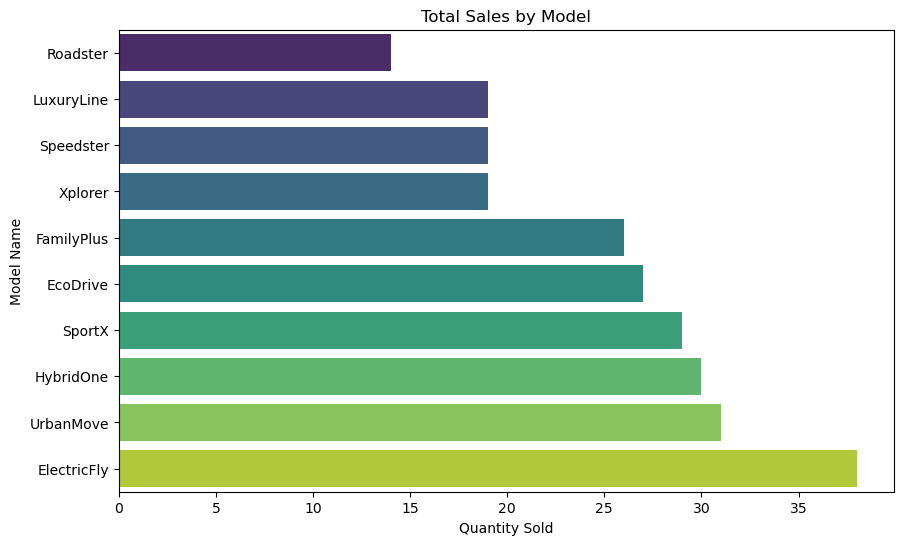

In [35]:


# Merge relevant data for analysis
merged_sales = (
    dataframes["Sales"]
    .merge(all_sheets["Models"], on="ModelID", how="left")
    .merge(all_sheets["Dealers"], on="DealerID", how="left")
    .merge(all_sheets["Customers"], on="CustomerID", how="left")
)

# Convert SaleDate to datetime for time-based analysis
merged_sales["SaleDate"] = pd.to_datetime(merged_sales["SaleDate"])

# Visualization 1: Total Sales by Model
sales_by_model = merged_sales.groupby("ModelName")["Quantity"].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_model, y=sales_by_model.index, palette="viridis")
plt.title("Total Sales by Model")
plt.xlabel("Quantity Sold")
plt.ylabel("Model Name")
plt.show()



C:\Users\robbe\AppData\Local\Temp\ipykernel_24644\2362260464.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = merged_sales.resample("M", on="SaleDate")["Quantity"].sum()


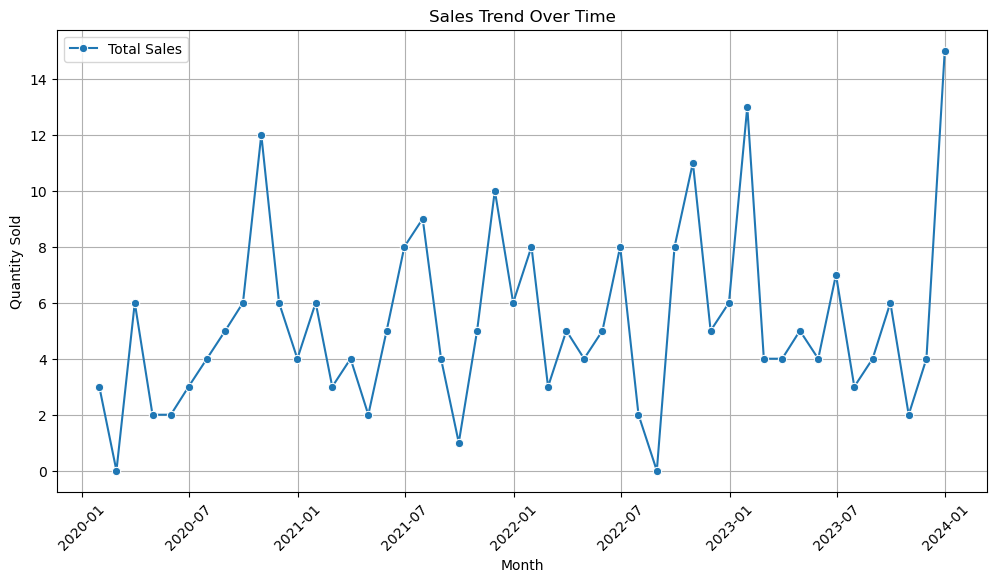

In [39]:
# Visualization 2: Sales Trend Over Time
sales_over_time = merged_sales.resample("M", on="SaleDate")["Quantity"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, marker="o", label="Total Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\robbe\AppData\Local\Temp\ipykernel_24644\2798185003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city, y=sales_by_city.index, palette="coolwarm")


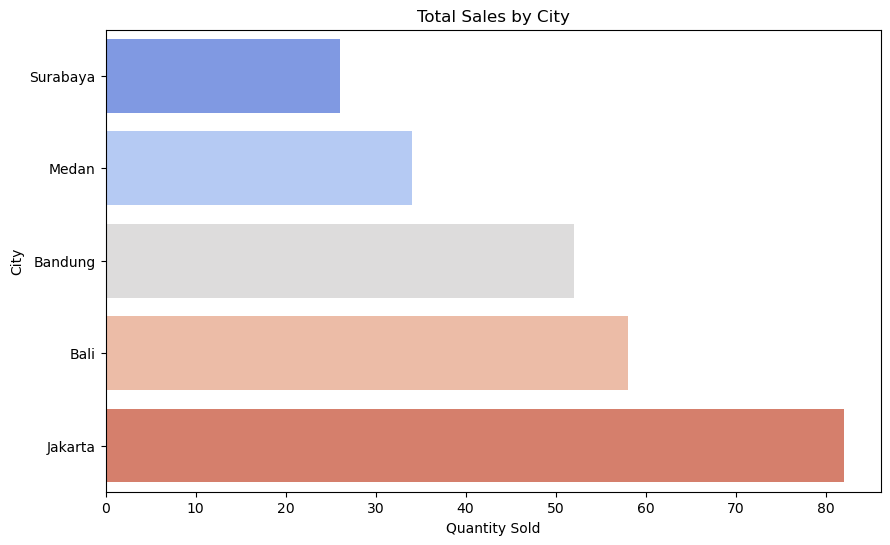

In [37]:
# Visualization 3: Sales by City
sales_by_city = merged_sales.groupby("City_x")["Quantity"].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_city, y=sales_by_city.index, palette="coolwarm")
plt.title("Total Sales by City")
plt.xlabel("Quantity Sold")
plt.ylabel("City")
plt.show()